In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
jp.head()

,Year,Japan
0,1945,18
1,1946,0
2,1947,0
3,1948,0
4,1949,0


In [358]:
#jp.plot.bar(title="Number of Registrants from Japan, 1945-2017", figsize=(12,6))

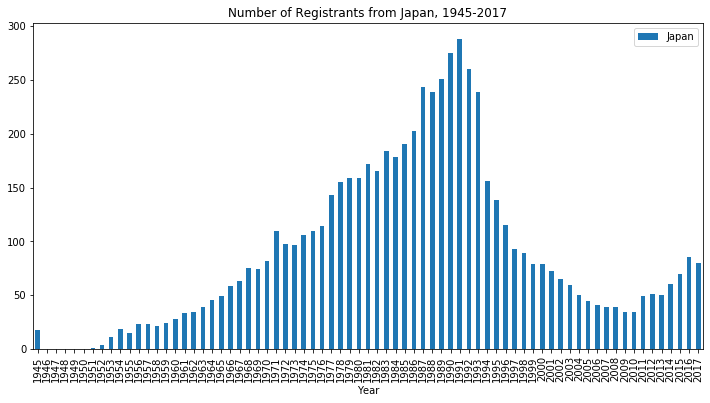

In [8]:
jp.plot.bar(title="Number of Registrants from Japan, 1945-2017", figsize=(12,6))

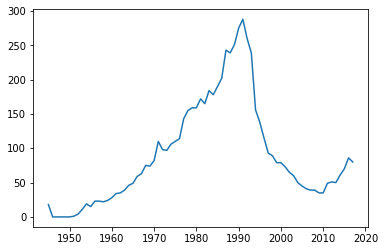

In [10]:
plt.plot(jp)

In [14]:
jp.columns

Index(['Japan'], dtype='object')

In [12]:
jp.columns

Index(['Year', 'Japan'], dtype='object')

In [18]:
jp.shape

(73, 1)

In [27]:
jp.columns

Index(['Year', 'Japan'], dtype='object')

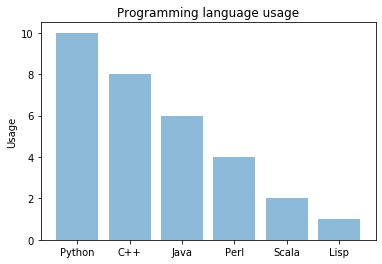

In [37]:
import numpy as np
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = [0, 1, 2, 3, 4, 5]
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [35]:
y_pos

array([0, 1, 2, 3, 4, 5])

In [36]:
performance

[10, 8, 6, 4, 2, 1]

In [38]:
jp['Year']

0     1945
1     1946
2     1947
3     1948
4     1949
      ... 
68    2013
69    2014
70    2015
71    2016
72    2017
Name: Year, Length: 73, dtype: int64

In [40]:
jp['Japan']

0     18
1      0
2      0
3      0
4      0
      ..
68    50
69    61
70    70
71    86
72    80
Name: Japan, Length: 73, dtype: int64

In [13]:
year = jp['Year'].to_numpy()

In [14]:
regs = jp['Japan'].to_numpy()

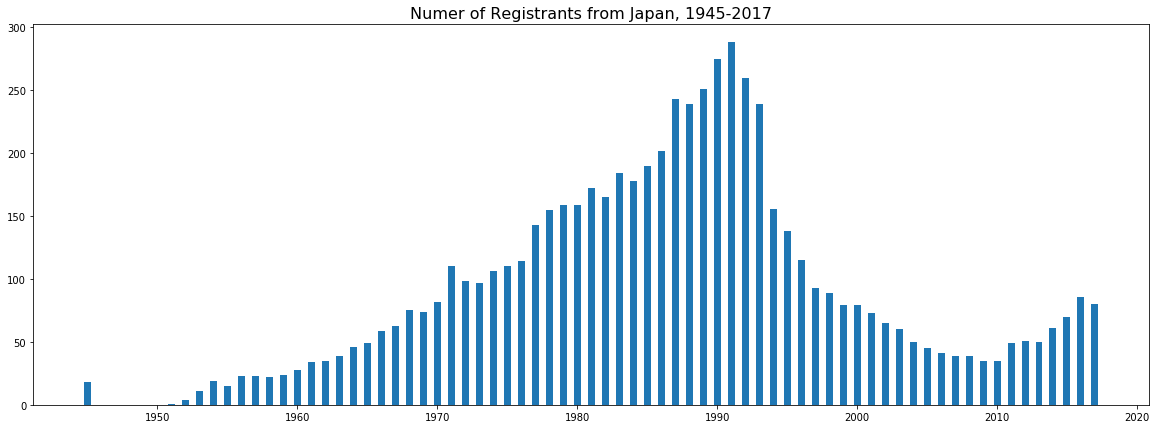

In [15]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,7))
plt.title('Numer of Registrants from Japan, 1945-2017', fontsize=16)
plt.bar(year, regs, width=0.5)
plt.show()

# Event Topic, 2015-2019

In [6]:
topic = pd.read_csv('Book2.csv')
topic = topic[['Year', 'Topic', 'Org']]
topic['Topic'] = topic['Topic'].str.strip()

In [7]:
topic.columns

Index(['Year', 'Topic', 'Org'], dtype='object')

In [8]:
topic.head()

,Year,Topic,Org
0,2019,Economy,Brookings
1,2019,Economy,Brookings
2,2019,Economy,Brookings
3,2019,Economy,Brookings
4,2019,Economy,Brookings


In [9]:
total_occ = topic['Topic'].value_counts()
total_occ

Alliance                        487
Security                        395
Economy                         168
Energy                           68
Japanese Politics                44
Environment                      32
Cybersecurity and Technology     25
History                          17
Women                            16
Social Issues                     6
Education                         4
Name: Topic, dtype: int64

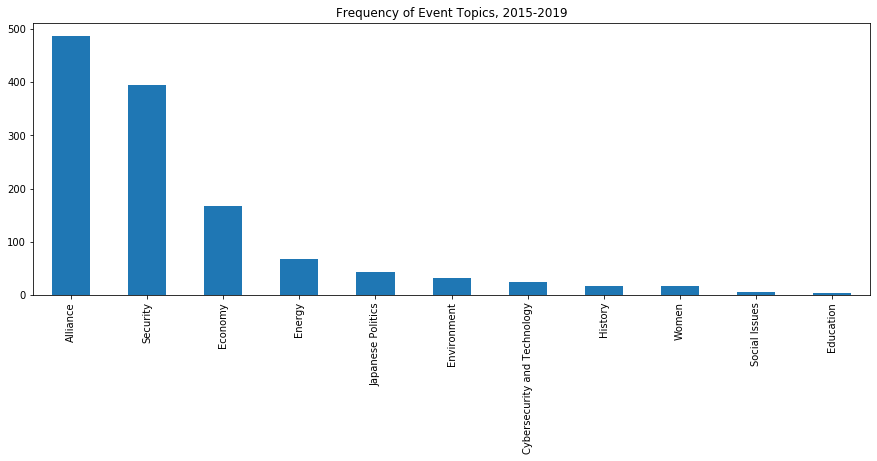

In [164]:
total_occ.plot.bar(figsize=(15,5), title="Frequency of Event Topics, 2015-2019")
plt.show()

In [167]:
org_topic = topic.groupby(['Org', 'Topic']).count()

In [168]:
org_topic.sum()

Year    1262
dtype: int64

In [169]:
org_topic.to_csv('org_topic.csv')

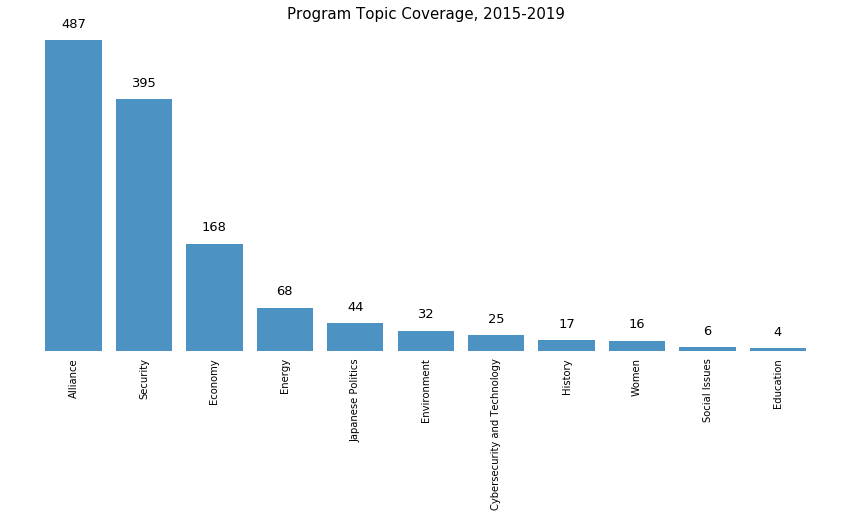

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))

ax = plt.gca()

xvals = total_occ.index
bars = plt.bar(xvals, total_occ, align='center', alpha=0.8)

# set title
plt.title("Program Topic Coverage, 2015-2019", fontsize=15)

# display values in bars
for i in range(len(total_occ)):
    plt.text(i, bars[i].get_height()+20, str(total_occ[i]), color='black', ha='center', size=13)

# rotate x-axis label
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(90)

#remove ticks
ax.tick_params(top=False,left=False,bottom=False,right=False,labelleft=False,labelbottom=True, labelsize=10)

# remove lines
for spine in ax.spines.values():
    spine.set_visible(False)

In [49]:
total_occ.sum()

1262

In [56]:
total_occ.apply(lambda x: x * 100/ total_occ.sum())

Alliance                        38.589540
Security                        31.299525
Economy                         13.312203
Energy                           5.388273
Japanese Politics                3.486529
Environment                      2.535658
Cybersecurity and Technology     1.980983
History                          1.347068
Women                            1.267829
Social Issues                    0.475436
Education                        0.316957
Name: Topic, dtype: float64

In [54]:
total_occ['Alliance']

487

In [68]:
org_topic

Year
Org       Topic                             
Brookings Economy                         69
          Alliance                        45
          Security                        19
          Japanese Politics               12
          Environment                      9
          Women                            5
          Energy                           4
CSIS      Security                        93
          Alliance                        57
          Economy                         31
          Cybersecurity and Technology    11
          History                          4
          Energy                           1
Carnegie  Alliance                       125
          Security                        80
          Economy                         17
          Energy                           9
          Cybersecurity and Technology     6
          Japanese Politics                6
          History                          2
Sasakawa  Alliance                       211
          Security                       192
          Energy                          48
          Environment                     23
          Economy                         21
          Japanese Politics               17
          History                          7
          Women                            7
          Cybersecurity and Technology     4
          Education                        4
Wilson    Alliance                        49
          Economy                         30
          Security                        11
          Japanese Politics                9
          Energy                           6
          Social Issues                    6
          Cybersecurity and Technology     4
          History                          4
          Women                            4

In [111]:
org_topic = topic.groupby(['Org', 'Topic']).count().sort_values(by=['Org','Year'], ascending=[True, False])
org_topic.loc[['Brookings']]

Year
Org       Topic                  
Brookings Economy              69
          Alliance             45
          Security             19
          Japanese Politics    12
          Environment           9
          Women                 5
          Energy                4

In [93]:
org_topic.query("Year > 30")

Year
Org       Topic         
Brookings Economy     69
          Alliance    45
CSIS      Security    93
          Alliance    57
          Economy     31
Carnegie  Alliance   125
          Security    80
Sasakawa  Alliance   211
          Security   192
          Energy      48
Wilson    Alliance    49

In [117]:
org_topic = org_topic.rename(columns={'Org':'Organization'})

In [114]:
topic = topic.rename(columns={'Org':'Organization'})

In [115]:
topic

,Year,Topic,Organization
0,2019,Economy,Brookings
1,2019,Economy,Brookings
2,2019,Economy,Brookings
3,2019,Economy,Brookings
4,2019,Economy,Brookings
...,...,...,...
1257,2015,Economy,Wilson
1258,2015,Alliance,Wilson
1259,2015,Women,Wilson
1260,2015,Security,Wilson


In [121]:
org_topic = org_topic.rename({'Org':'Organization'})
topic

,Year,Topic,Organization
0,2019,Economy,Brookings
1,2019,Economy,Brookings
2,2019,Economy,Brookings
3,2019,Economy,Brookings
4,2019,Economy,Brookings
...,...,...,...
1257,2015,Economy,Wilson
1258,2015,Alliance,Wilson
1259,2015,Women,Wilson
1260,2015,Security,Wilson


In [135]:
topic.loc[(topic['Year']==2019) & (topic['Organization']=='Brookings')]

,Year,Topic,Organization
0,2019,Economy,Brookings
1,2019,Economy,Brookings
2,2019,Economy,Brookings
3,2019,Economy,Brookings
4,2019,Economy,Brookings
5,2019,Economy,Brookings
6,2019,Economy,Brookings
7,2019,Economy,Brookings
8,2019,Economy,Brookings


In [146]:
org_topic

Year
Org       Topic                             
Brookings Economy                         69
          Alliance                        45
          Security                        19
          Japanese Politics               12
          Environment                      9
          Women                            5
          Energy                           4
CSIS      Security                        93
          Alliance                        57
          Economy                         31
          Cybersecurity and Technology    11
          History                          4
          Energy                           1
Carnegie  Alliance                       125
          Security                        80
          Economy                         17
          Energy                           9
          Cybersecurity and Technology     6
          Japanese Politics                6
          History                          2
Sasakawa  Alliance                       211
          Security                       192
          Energy                          48
          Environment                     23
          Economy                         21
          Japanese Politics               17
          History                          7
          Women                            7
          Cybersecurity and Technology     4
          Education                        4
Wilson    Alliance                        49
          Economy                         30
          Security                        11
          Japanese Politics                9
          Energy                           6
          Social Issues                    6
          Cybersecurity and Technology     4
          History                          4
          Women                            4

In [163]:
t1 = org_topic.loc['Wilson']

In [164]:
t1

,Year
Topic,
Alliance,49
Economy,30
Security,11
Japanese Politics,9
Energy,6
Social Issues,6
Cybersecurity and Technology,4
History,4
Women,4


In [165]:
t1.index

Index(['Alliance', 'Economy', 'Security', 'Japanese Politics', 'Energy',
       'Social Issues', 'Cybersecurity and Technology', 'History', 'Women'],
      dtype='object', name='Topic')

In [196]:
def fun(r):
    return (r.values*100/t1.sum()).round(2)
    
t1.apply(fun, axis=1)

,Year
Topic,
Alliance,39.84
Economy,24.39
Security,8.94
Japanese Politics,7.32
Energy,4.88
Social Issues,4.88
Cybersecurity and Technology,3.25
History,3.25
Women,3.25


In [184]:
t1.count()

Year    9
dtype: int64

# FARA Data

In [112]:
data = pd.read_csv('lobbying money.csv')

# clean columns and rows
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.dropna()
data.drop('Year',axis=1,inplace=True)
data = data.rename(columns={'Year2':'Year'})
data = data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# cast correct data type
data.loc[:,'Year'] = pd.to_datetime(data.loc[:,'Year'],format='%Y').dt.to_period('Y')
data.loc[:, 'Money'] = pd.to_numeric(data.loc[:,'Money'],downcast='float')

# keep relevant column
keep = ['Registrant','Money','Foreign_Agency','Country','Year']
fara = data[keep]

# each country
jpfara = fara.loc[fara['Country']=='Japan']
twfara = fara.loc[fara['Country']=='Taiwan']
skfara = fara.loc[fara['Country']=='South Korea']

## Japan

In [275]:
# amounts over time
y_m = jpfara.groupby(['Year'])['Money'].sum()

# top donors each year
y_fa = jpfara.groupby(['Foreign_Agency','Year']).agg({'Money':'sum'})

array(['Japan External Trade Organization (JETRO)',
       'JNG Shareholders Group', 'Embassy of Japan',
       'Japan National Tourist Organization', 'Government of Japan',
       'Manufactured Imports and Investment Promotion Organization (MIPRO)',
       'Osaka University', 'Kobe Municipal Government',
       'Fukuoka Prefectural Government', 'Consulate General of Japan'],
      dtype=object)

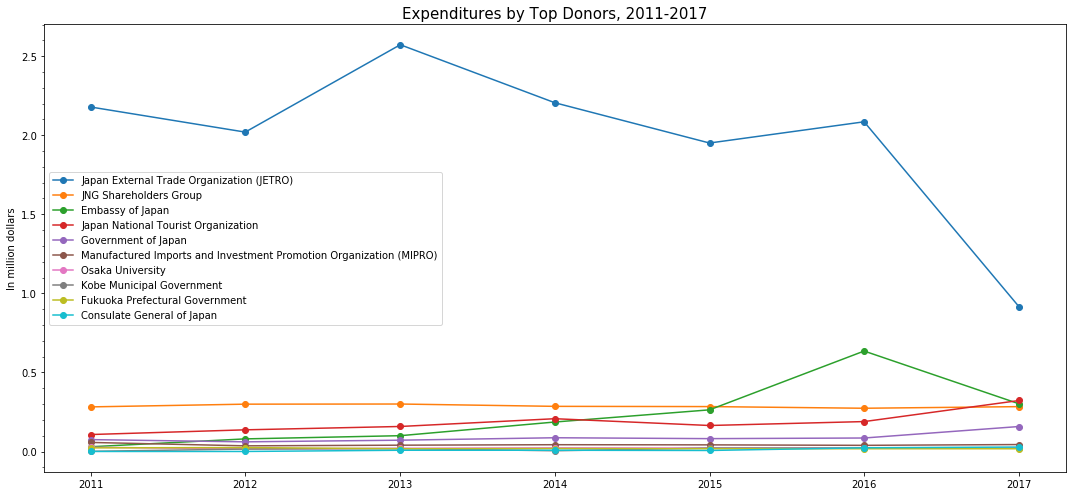

In [343]:
import matplotlib.ticker as ticker
# plot expenditures by top 10 donors over time
#donors = ['Embassy of Japan', 'Government of Japan', 'Japan External Trade Organization (JETRO)', 
#          'Japan National Tourist Organization', 'JNG Shareholders Group', 'Consulate General of Japan',
#          'Tokyo Electric Power Company (TEPCO)']

# top donors 2011-2017
d = jpfara.groupby('Foreign_Agency')['Money'].sum().sort_values(ascending=False).head(10)
donors = d.index.values

y = pd.date_range('2011',freq='Y',periods=7).to_period('Y')

fig, ax = plt.subplots(figsize=(15,7))

for i in range(len(donors)):
    rec = y_fa.loc[donors[i]]
    rec = rec.reindex(y,method='nearest')
    plt.plot(y.to_timestamp(), rec.values/10000000,label=donors[i], linestyle='-', marker='o')
    # print(rec)

plt.ylabel('In million dollars') 
plt.title('Expenditures by Top Donors, 2011-2017', fontsize=15)
plt.legend()

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

plt.savefig('exp top donors.png')

plt.tight_layout()
plt.show()

### example of reindexing to fill in missing values
```
idx = pd.date_range('09-01-2013', '09-10-2013')
s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
```

### example in plotting time series
```
import datetime as dt
x = [dt.datetime(2010, 12, 1),
    dt.datetime(2011, 1, 4),
    dt.datetime(2011, 5, 5)]
y = np.array([4, 9, 2])
z = np.array(['2010-12-01','2011-01-04','2011-05-05'],dtype='datetime64[D]')

ax = plt.subplot(111)
ax.bar(x, y, width=10)
ax.xaxis_date()

plt.show()

```

### example 2 of plotting time series 

```
from matplotlib.dates import date2num, YearLocator, DateFormatter
import datetime as dt

x = [
    dt.datetime(2011, 1, 1, 0, 0),
    dt.datetime(2012, 1, 1, 0, 0),
    dt.datetime(2013, 1, 1, 0, 0),
    dt.datetime(2014, 1, 1, 0, 0),
    dt.datetime(2015, 1, 1, 0, 0),
    dt.datetime(2016, 1, 1, 0, 0),
    dt.datetime(2017, 1, 1, 0, 0)
]
x2 = date2num(x)

plt.figure(figsize=(15,5))

yvals = np.random.randint(1,8,7)
x3 = np.arange(2011,2018,1)
plt.bar(x2, yvals, color='black')

ax = plt.gca()
ax.xaxis_date()
#years = YearLocator()
#yearsFmt = DateFormatter('%Y')
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(yearsFmt)

plt.show()
```

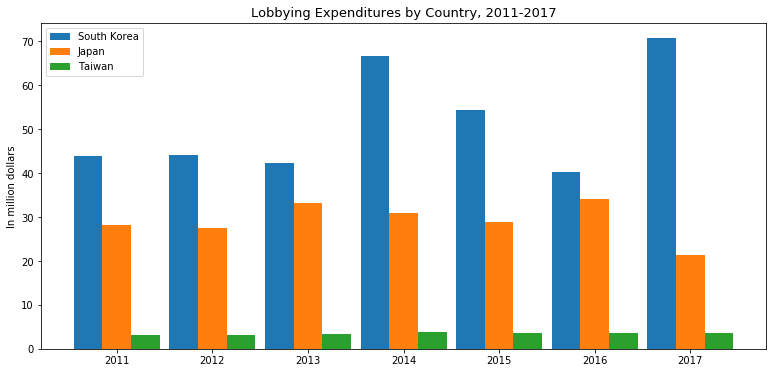

In [356]:
import matplotlib.ticker as ticker

country_year = fara.groupby(['Country','Year']).sum()

jp = country_year.loc['Japan']
sk = country_year.loc['South Korea']
tw = country_year.loc['Taiwan']

plt.figure(figsize=(13,6))
ax = plt.gca()

#sk.index = pd.to_datetime(sk.index, format='%Y')
#jp.index = pd.to_datetime(jp.index, format='%Y')
#tw.index = pd.to_datetime(tw.index, format='%Y')

x = sk.index.year

plt.bar(x-0.3, sk['Money']/1000000, width=0.3)
plt.bar(x, jp['Money']/1000000, width=0.3)
plt.bar(x+0.3, tw['Money']/1000000, width=0.3)

plt.legend(['South Korea', 'Japan', 'Taiwan'])
plt.title('Lobbying Expenditures by Country, 2011-2017', size=13)
plt.ylabel('In million dollars')

plt.show()
#plt.savefig('lobbying expenditure.png')

In [357]:
fara.head()

,Registrant,Money,Foreign_Agency,Country,Year
0,"Alston & Bird, LLP",100000.0,Taipei Economic and Cultural Representative Of...,Taiwan,2011
1,"Alston & Bird, LLP",120000.0,Taipei Economic and Cultural Representative Of...,Taiwan,2011
2,"Alston & Bird, LLP",120000.0,Taipei Economic and Cultural Representative Of...,Taiwan,2012
3,"Alston & Bird, LLP",120000.0,Taipei Economic and Cultural Representative Of...,Taiwan,2012
4,"Alston & Bird, LLP",120000.0,Taipei Economic and Cultural Representative Of...,Taiwan,2013


# Registrants

In [633]:
regs = pd.read_csv('registrants.csv',header=0,index_col=0)
regs

,Japan,SK,TW
Year,,,
1945,18,11,0
1946,0,7,0
1947,0,4,0
1948,0,3,0
1949,0,3,0
...,...,...,...
2013,50,37,25
2014,61,38,23
2015,70,40,21


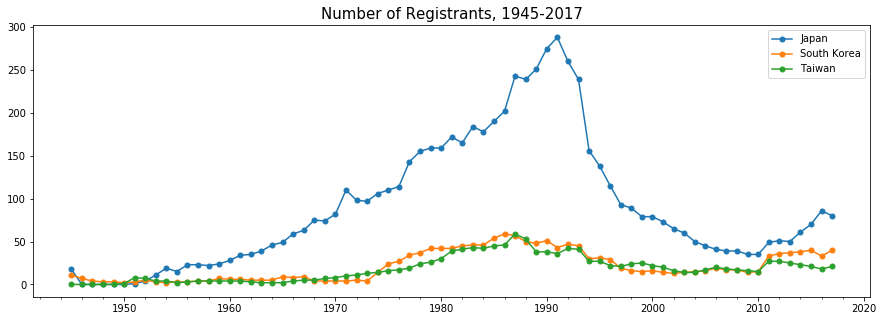

In [667]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

regs.index = pd.to_datetime(regs.index, format="%Y")
plt.figure(figsize=(15,5))
plt.plot(regs.index.year, regs.Japan, '-o', regs.index.year, regs.SK, '-o', regs.index.year, regs.TW, '-o', markersize=5)

ax = plt.gca()
years = mdates.YearLocator()

#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(years_fmt)

#ax.set_xlim(1945,2020)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.title('Number of Registrants, 1945-2017', size=15)
plt.legend(['Japan','South Korea','Taiwan'])
plt.savefig('registrants.png')

plt.show()

# Think Tank Funding

In [722]:
ttfund = pd.read_csv('ttfund.csv')
ttfund = ttfund.rename(columns={'Sum of Min Plus Actual':'Sum'})
ttfund['Sum'].str.strip()

0      50000
1     100000
2      50000
3     100000
4      25000
       ...  
79         0
80         0
81         0
82         0
83         0
Name: Sum, Length: 84, dtype: object

In [723]:
ttfund

,Think Tank,Specific Donor,Sum,Year
0,Atlantic Council,Ministry of Finance of Japan,50000,2015
1,Atlantic Council,Ministry of Foreign Affairs,100000,2016
2,Atlantic Council,Embassy of Japan,50000,2017
3,Atlantic Council,Embassy of Japan,100000,2018
4,Atlantic Council,Japan External Trade Organization,25000,2018
...,...,...,...,...
79,Stimson Center,Ministry of Defense,0,2017
80,World Resources Institute,Japan International Cooperation Agency,0,2014
81,World Resources Institute,Japan International Cooperation Agency,0,2015
82,World Resources Institute,Japan International Cooperation Agency,0,2016


In [742]:
ttfund['Sum'] = ttfund['Sum'].astype('i')

In [746]:
tt = ttfund.groupby('Think Tank')['Sum'].sum().sort_values(ascending=False)
tt

Think Tank
Brookings Institution                                                1875000
Carnegie Endowment for International Peace                            825000
Center for Strategic and International Studies                        500000
Center for American Progress                                          475000
Atlantic Council                                                      375000
Hudson Institute                                                      270000
German Marshall Fund of the United States                             250000
Center for a New American Security                                    125000
Chicago Council on Global Affairs                                      87724
Peterson Institute for International Economics                         50000
Inter-American Dialogue                                                14000
National Bureau of Economic Research                                   10000
James A. Baker III Institute for Public Policy - Rice University 

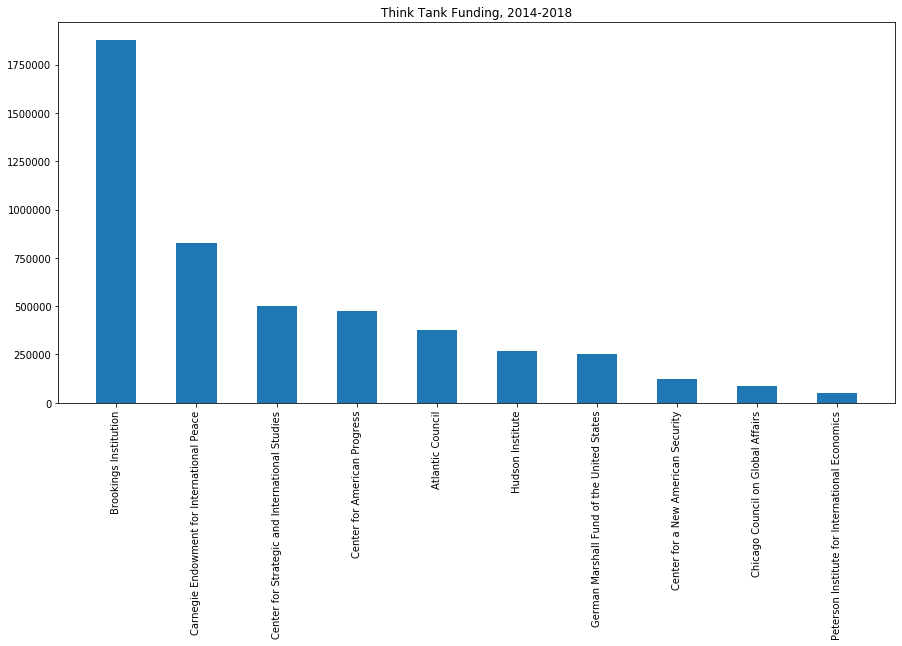

In [766]:
plt.figure(figsize=(15,7))
plt.bar(tt.index.values[0:10], tt.values[0:10], width=0.5)

x = plt.gca()
for i in x.xaxis.get_ticklabels():
    i.set_rotation(90)

plt.title('Think Tank Funding, 2014-2018')
tt.to_csv('Think Tank Funding_2014-2018')
plt.savefig('Think Tank Funding_2014-2018.png')
plt.show()

In [1]:
jp

NameError: name 'jp' is not defined